In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('low-carbon-share-energy.csv')

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']

df = df[df['Year'] == 2019]

merge = pd.merge(world, df, on='Code', how="left", left_on=None)
result = merge.drop(['continent', 'name', 'gdp_md_est', 'pop_est'], axis=1)

worldTotal = pd.read_csv('low-carbon-share-energy.csv')
worldTotal = worldTotal[worldTotal['Entity'] == 'World']
worldTotal = worldTotal.drop(['Code', 'Entity'], axis=1)

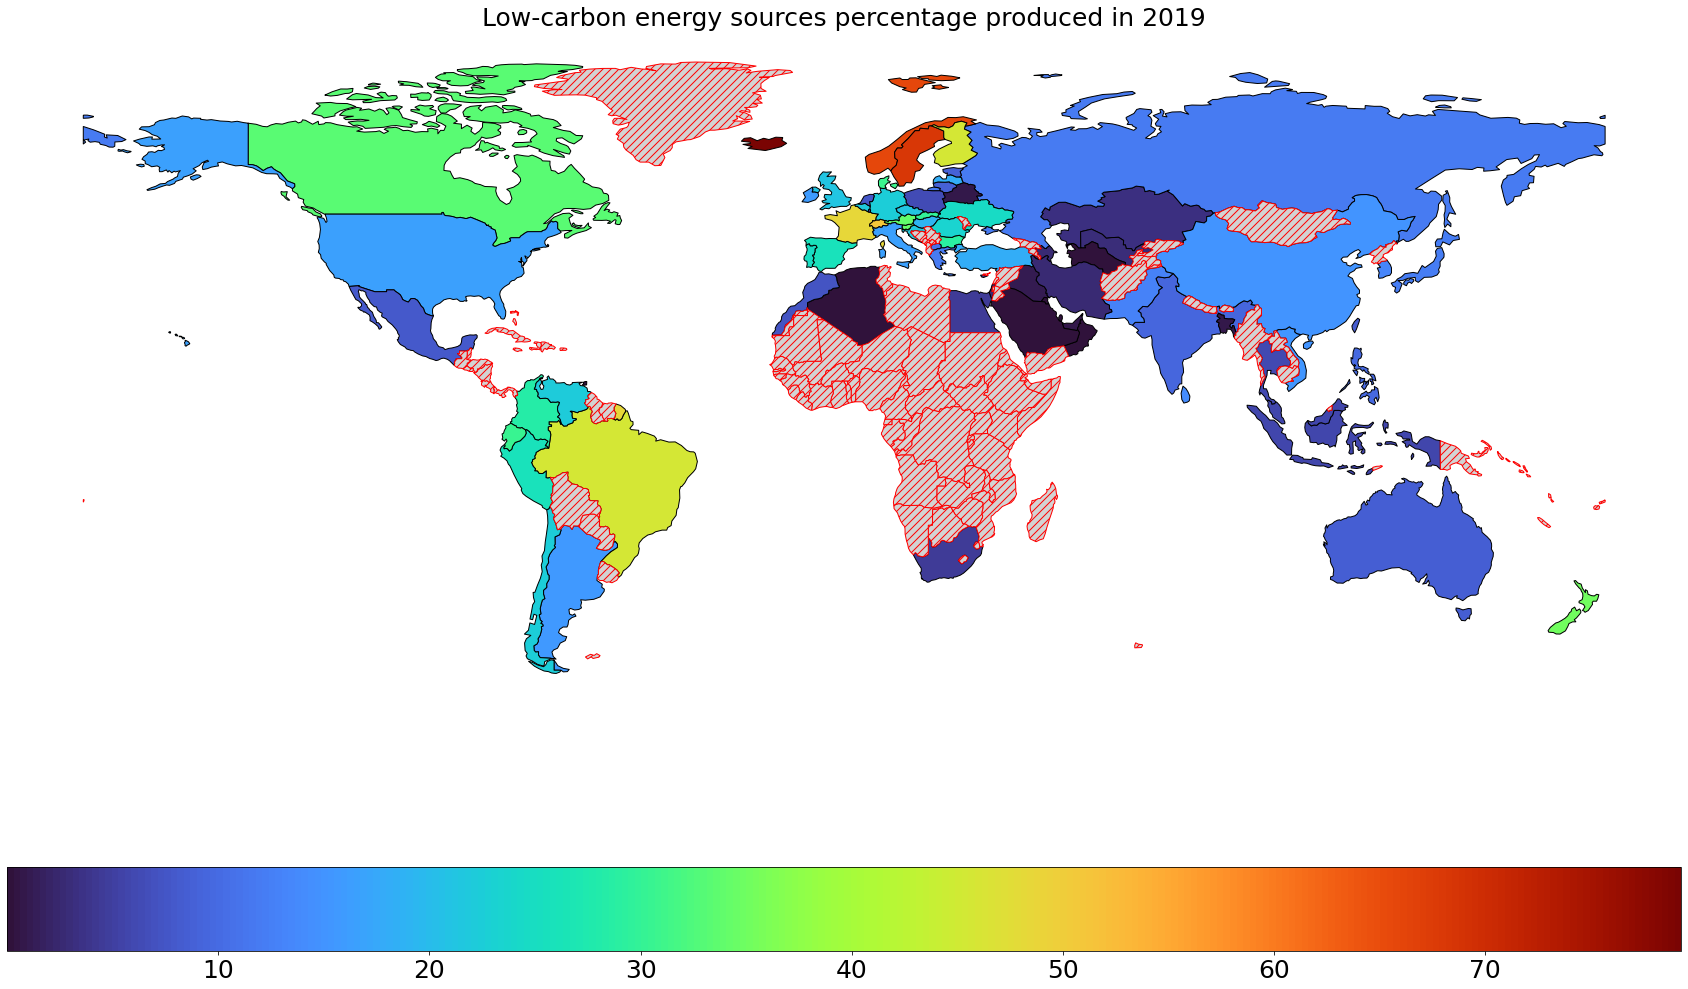

In [2]:
fig, axis = plt.subplots(1, figsize=(30,20))
result.plot(ax=axis, column='Low-carbon energy (% sub energy)', legend=True, 
            legend_kwds={'orientation': "horizontal"}, 
            cmap='turbo', edgecolor='black',
            missing_kwds={"color": "lightgrey",
                          "edgecolor": "red",
                          "hatch": "///",
                          "label": "Missing values"})
plt.title("Low-carbon energy sources percentage produced in 2019", fontsize=25)
axis.set_axis_off();

fig = axis.figure
cb = fig.axes[1]
cb.tick_params(labelsize=25)

plt.savefig('Share of energy from low carbon sources in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()

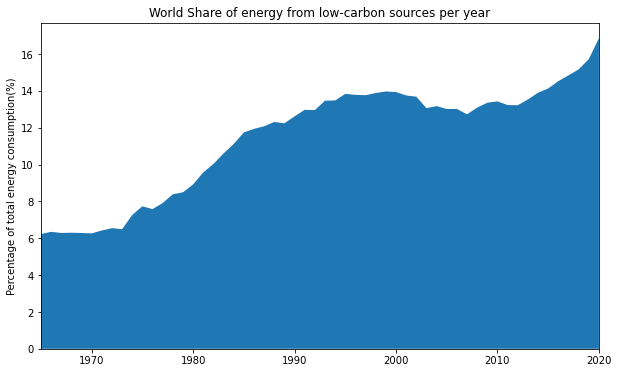

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(worldTotal['Year'], worldTotal['Low-carbon energy (% sub energy)'])
plt.margins(x=0)
ax.set_title('World Share of energy from low-carbon sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from low carbon sources by years (scale error).jpg', dpi=300, bbox_inches='tight')
plt.show()

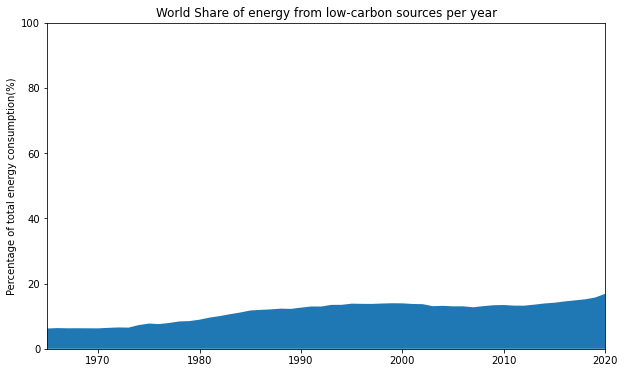

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(worldTotal['Year'], worldTotal['Low-carbon energy (% sub energy)'])
ax.set_ylim(ymin=0, ymax=100)
plt.margins(x=0)
ax.set_title('World Share of energy from low-carbon sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from low carbon sources by years.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
nuclear = pd.read_csv('nuclear-primary-energy.csv')
renewable = pd.read_csv('renewable-share-energy.csv')

nuclear = nuclear[nuclear['Entity'] == 'World']
renewable = renewable[renewable['Entity'] == 'World']

nuclear = nuclear.drop(['Entity', 'Code'], axis=1)
renewable = renewable.drop(['Entity', 'Code'], axis=1)

finalResult = pd.merge(nuclear, renewable, on='Year')

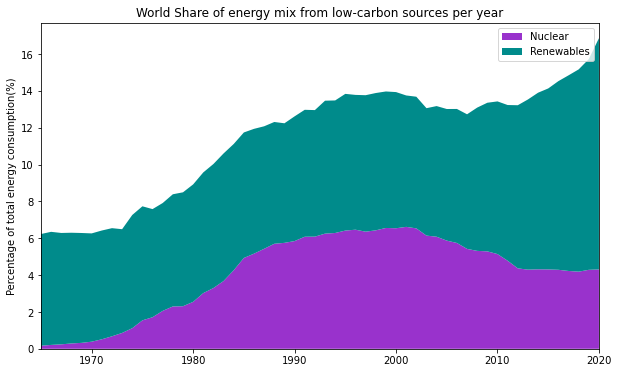

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(finalResult['Year'], finalResult['Nuclear (% sub energy)'], finalResult['Renewables (% sub energy)'],
             colors=['darkorchid', 'darkcyan'], labels=['Nuclear', 'Renewables'])
ax.legend(loc='upper right')
plt.margins(x=0)
ax.set_title('World Share of energy mix from low-carbon sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from low carbon sources by years (mix with scale error).jpg', dpi=300, bbox_inches='tight')
plt.show()

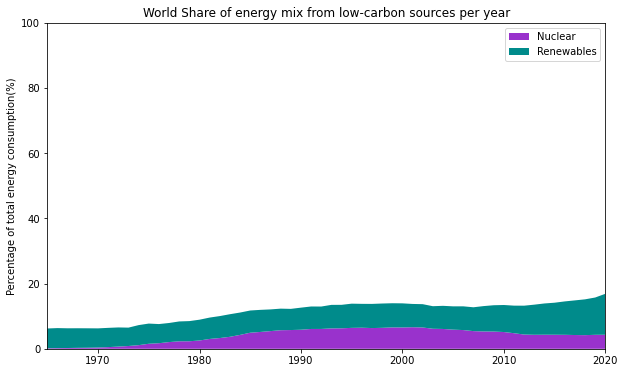

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(finalResult['Year'], finalResult['Nuclear (% sub energy)'], finalResult['Renewables (% sub energy)'],
             colors=['darkorchid', 'darkcyan'], labels=['Nuclear', 'Renewables'])
ax.legend(loc='upper right')
ax.set_ylim(ymin=0, ymax=100)
plt.margins(x=0)
ax.set_title('World Share of energy mix from low-carbon sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from low carbon sources by years (mix).jpg', dpi=300, bbox_inches='tight')
plt.show()